In [55]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint


One Member population curves from https://rdcu.be/dSWMG



$$\frac{dp}{dt} = \mu (1-p)p$$

We generate a dataset of 1000 individual growth curves by drawing the growth rate parameter $\mu$ from a Normal distribution $\mu \sim \mathcal{N}(0.13,0.02)$. We choose these values arbitrarily, and they can be readily adjusted in the code below to user specification.

In [3]:
mean = 0.13
std = 0.02

In [46]:
def logistic(p, t, mu):
    return mu * p * (1-p)


In [50]:
time_range = np.linspace(0, 100, 101) # 0 - 100


#Initial Condition
p_0 = 0.5

In [61]:
# We generate 1000 samples
n = 1000

sols = []
for i in range(n):
    # We sample the growth reate
    mu = std*np.random.randn(1)+mean
    sol = odeint(logistic, p_0, time_range, args = (mu,)).squeeze()

    # Take the difference of the data
    sol = np.diff(sol)
    sols.append(sol)
    
# Print the shape of the final matrix
sols = np.array(sols)
sols.shape

(1000, 100)

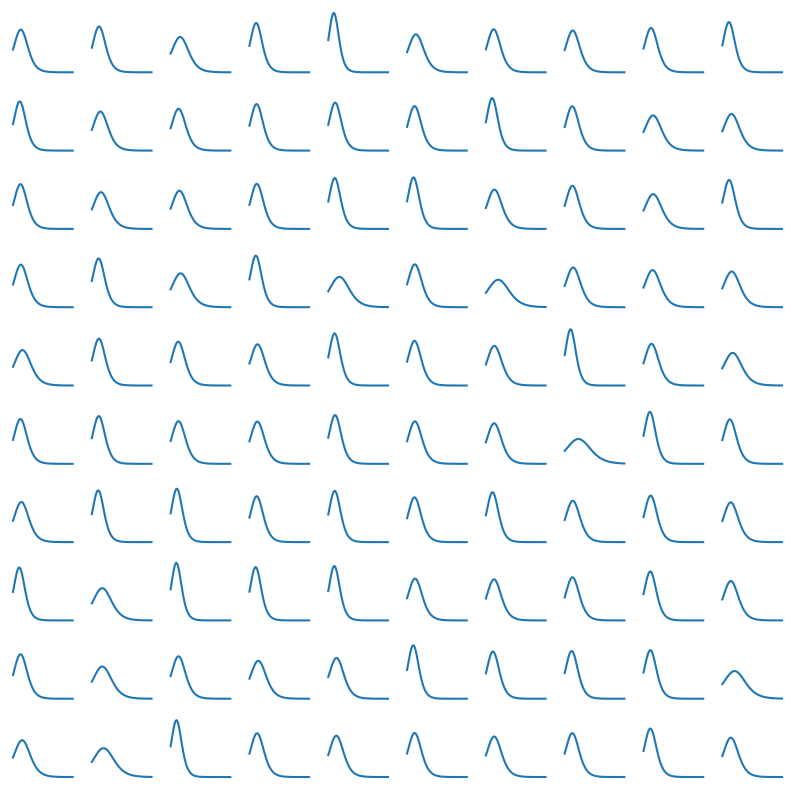

In [62]:
fig, axs = plt.subplots(10,10, figsize = (10,10), sharex = True, sharey = True)
axs = axs.flatten()

for i in range(100):
    axs[i].plot(sols[i])
    axs[i].axis("off")
plt.show()

In [64]:
np.savetxt("simple_ts.csv", sols, delimiter=",")